In [1]:
import numpy as np
from random import *
import matplotlib.pyplot as plt

In [2]:
n = int(input("Enter Number of Arms:")) # number of arms
N = int(input("Enter Number of Iterations:")) # number of simulations
tau = int(input("Enter temperature:"))
rate = float(input("Enter rate of change of tau:"))
reward = np.zeros(n, dtype = "float32")
print("Enter Values of Rewards:")
for i in range(n):
    reward[i] = float(input())

print(f"Input of Rewards: {reward}")

Enter Number of Arms: 3
Enter Number of Iterations: 100000
Enter temperature: 1
Enter rate of change of tau: 0.05


Enter Values of Rewards:


 1.2
 5.5
 3.8


Input of Rewards: [1.2 5.5 3.8]


In [3]:
# Define Action class 
class Actions: 
    def __init__(self, m): 
        self.m = m # reward for arm
        self.mean = 0 # average reward for arm 
        self.N = 0 #Number of Simulations
  
  # Choose a random action 
    def choose(self):  
        return np.random.randn() + self.m  #adding a random number to reward to add noise
  
  # Update the action-value estimate 
    def update(self, x): 
        self.N += 1
        self.mean = (1 - 1.0 / self.N)*self.mean + 1.0 / self.N * x 
    
    def run_experiment(rewards, temp, delt, N): 
        def softMax(rew):
            den = np.sum(np.exp(rew/temp))
            expr = np.zeros(len(rew))
            for i in range(len(rew)):
                expr[i] = np.exp(rew[i]/temp)/den
            
            
            return np.round(expr,1)
        
        actions = []
        for i in range(len(rewards)):
            actions.append(Actions(rewards[i]))
        data = np.empty(N) 
    
        for i in range(N): 
            # Softmax Algorithm
            j = np.random.choice(3, p = softMax(rewards))    
            x = actions[j].choose() 
            actions[j].update(x) 

            # for the plot 
            data[i] = x 
        cumulative_average = np.cumsum(data) / (np.arange(N) + 1) 

        for a in actions: 
            print(a.mean)
            
        temp = temp*(1-delt) # annealing temperature
        return cumulative_average
    
    def plotResult(cum_avg,rewards,N):
        # plot moving average ctr 
        plt.plot(cum_avg) 
        for i in range(len(rewards)):
            plt.plot(np.ones(N)*rewards[i]) 
            plt.xscale('log')
            plt.xlim(1,N)
            plt.ylim(0,6)
        plt.show()

0
5.508752641080816
3.7987618640375853


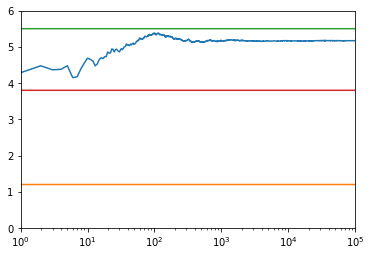

In [4]:
c_1 = Actions.run_experiment(reward,tau,rate,N)
Actions.plotResult(c_1,reward,N)